# S-curves
Explaining how to go from pulse-height measurements to characterisation of the gain and efficiency of a PMT (or pixel of an MAPMT).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
plt.style.use('minimalist')
color = plt.cm.viridis(0.1)
fs = 20

### QDC counts vs. time

In [141]:
N = 400
time = np.linspace(0, 100, N)
noise = np.random.normal(0, 1, N)
signal = (35*norm(loc=15, scale=2).pdf(time) 
          + 35*norm(loc=85, scale=2.3).pdf(time) 
          + 35*norm(loc=50, scale=2.7).pdf(time))

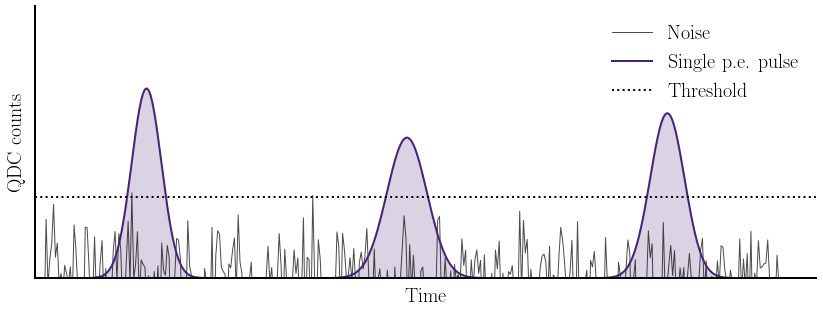

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 5)
ax.plot(time, noise, lw=1, color='k', alpha=0.7, label='Noise')
ax.plot(time, signal,lw=2, color=color, label='Single p.e. pulse')
ax.fill_between(time, signal, np.tile(0, N), color=color, alpha=0.2)
ax.axhline(0, color='k', lw=2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0, 105)
ax.set_ylim(0, 10)
ax.set_ylabel('QDC counts', labelpad=10, fontsize=fs)
ax.set_xlabel('Time', labelpad=10, fontsize=fs)
ax.axhline(3, lw=2, linestyle=":", label='Threshold')
ax.legend(fontsize=fs)
fig.savefig('figures/qdc_vs_time.pdf', dpi=500, bbox_inches='tight')

## Single photoelectron spectrum

In [143]:
noise = np.random.normal(0, 1, 10000)
pulse = np.random.normal(6, 1.5, 2500)
bins = np.linspace(-2, 14)

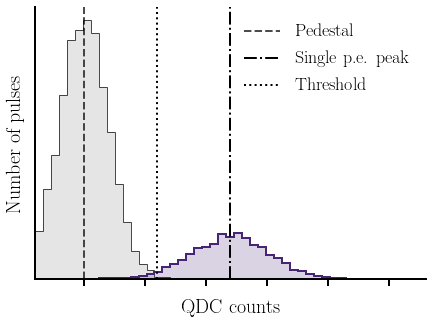

In [144]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.hist(noise, bins=bins, color='k', alpha=0.1)
ax.hist(noise, bins=bins, color='k', alpha=0.7, histtype='step', lw=1, )
ax.axvline(0, color='k', label='Pedestal', alpha=0.7, linestyle='--')
ax.hist(pulse, bins=bins, color=color, alpha=0.2)
ax.hist(pulse, bins=bins, color=color, histtype='step', lw=2)
ax.axvline(6, label='Single p.e. peak', linestyle='-.', LW=2)
ax.axvline(3, lw=2, color='k', linestyle=':', label='Threshold')
ax.legend(fontsize=fs-2)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_xlabel('QDC counts', labelpad=10, fontsize=fs)
ax.set_ylabel('Number of pulses', labelpad=10, fontsize=fs)
fig.savefig('figures/single_pe_spectrum.pdf', dpi=500, bbox_inches='tight')

## S-curve

In [145]:
counts = np.concatenate([noise, pulse])
color2 = 'k'

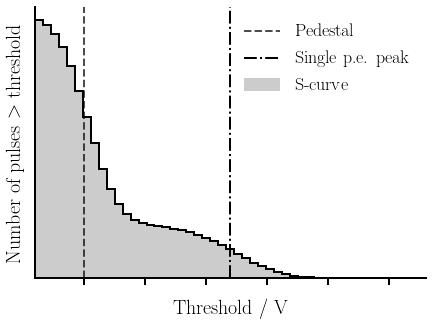

In [146]:
fig, ax = plt.subplots()
ax.hist(counts, cumulative=-1, bins=bins, histtype='step', color=color2, lw=2)
ax.hist(counts, cumulative=-1, bins=bins, alpha=0.2, color=color2, label='S-curve')
ax.axvline(0, color='k', label='Pedestal', alpha=0.7, linestyle='--', lw=2)
ax.axvline(6, color='k', label='Single p.e. peak', linestyle='-.', lw=2)
ax.legend(fontsize=fs-2)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_xlabel('Threshold / V', labelpad=10, fontsize=fs)
ax.set_ylabel('Number of pulses $>$ threshold', labelpad=10, fontsize=fs)
fig.savefig('figures/explain_scurve.pdf', dpi=500, bbox_inches='tight')

## Measuring the gain and efficiency

In [147]:
bins=np.linspace(-1, 14)

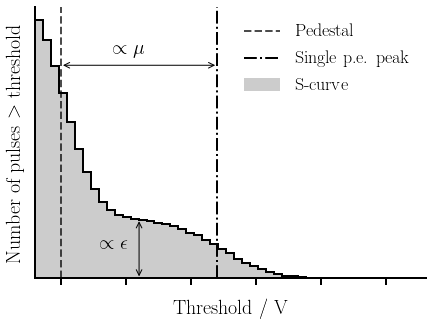

In [148]:
fig, ax = plt.subplots()
ax.hist(counts, cumulative=-1, bins=bins, histtype='step', color=color2, lw=2)
ax.hist(counts, cumulative=-1, bins=bins, alpha=0.2, color=color2, label='S-curve')
ax.axvline(0, color='k', label='Pedestal', alpha=0.7, linestyle='--', lw=2)
ax.axvline(6, color='k', label='Single p.e. peak', linestyle='-.', lw=2)
ax.legend(fontsize=fs-2)
ax.annotate(s='', xy=(0,9000), xytext=(6,9000), arrowprops=dict(arrowstyle='<->'))
ax.annotate(s='', xy=(3,0), xytext=(3,2500), arrowprops=dict(arrowstyle='<->'))
ax.text(2, 9500, '$\propto \mu$', fontsize=fs)
ax.text(1.5, 1250, '$\propto \epsilon$', fontsize=fs)
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_xlabel('Threshold / V', labelpad=10, fontsize=fs)
ax.set_ylabel('Number of pulses $>$ threshold', labelpad=10, fontsize=fs)
fig.savefig('figures/measure_scurve.pdf', dpi=500, bbox_inches='tight')

## S-curves for an example MAPMT

In [12]:
import os
import fnmatch
from compare import pltPMT, compare
from cycler import cycler

In [13]:
setup=np.genfromtxt('setup.dat', dtype=None)
unpot_data = 'unpotted_data/'

# Choose PMT (0-13)
i = 3 

# Load fixed config
PMT=int(setup[i][0])
ped=setup[i][1]
corrfac=setup[i][2]
k=setup[i][3]
ASIC=setup[i][4]
y_lim = 10000

for file in os.listdir(unpot_data):
    if fnmatch.fnmatch(file,'*'+str(PMT)+'*'):
        unpot = unpot_data+file

/Users/fran/.virtualenvs/bayes/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [14]:
DAC_PM_unpot, pmt_unpot = pltPMT(unpot)

cool_cycler = cycler(color=plt.cm.viridis(np.linspace(0, 1, 10)))

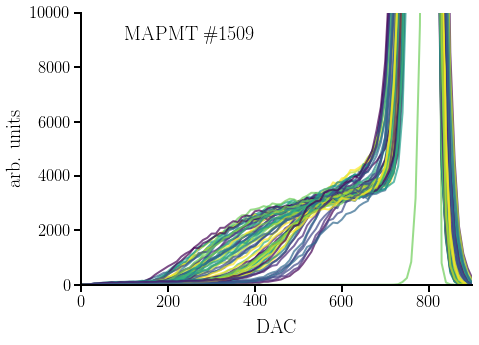

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_prop_cycle(cool_cycler)
ax.plot(DAC_PM_unpot, pmt_unpot, alpha=0.7)
ax.set_ylim(0, 1e4)

ax.set_xlabel('DAC', labelpad=10, fontsize=fs)
ax.set_ylabel('arb. units', labelpad=5, fontsize=fs)
ax.text(100, 9000, 'MAPMT \#' + str(PMT), fontsize=fs)
fig.savefig('figures/scurve_pmt_1509.pdf', dpi=500, bbox_inches='tight')

In [16]:
gains_before, gains_after, perc_diff = compare(PMT,ped,corrfac,k,ASIC)
bins = np.linspace(1, 6, 20)

/Users/fran/projects/euso/euso_spb/PMTsorting/gain_comparison/compare.py:40: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  ASICresponse = np.genfromtxt('ASICresponse.dat',dtype = None)


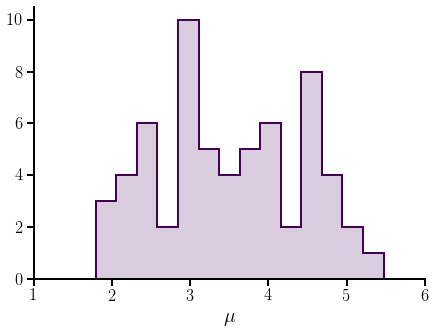

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.hist(gains_before, bins=bins, alpha=0.2, color=plt.cm.viridis(0));
ax.hist(gains_before, bins=bins, histtype='step', lw=2, color=plt.cm.viridis(0));
ax.set_xlabel('$\mu$', fontsize=fs)
fig.savefig('figures/gain_pmt_1509.pdf', dpi=500, bbox_inches='tight')

## EC unit comparison

In [50]:
setup=np.genfromtxt('setup.dat', dtype=None)
unpot_data = 'unpotted_data/'
pot_data = 'potted_data/PMT/'

# Choose PMT (0-13)
i = 3 

# Load fixed config
PMT=int(setup[i][0])
ped=setup[i][1]
corrfac=setup[i][2]
k=setup[i][3]
ASIC=setup[i][4]
y_lim = 10000

for file in os.listdir(unpot_data):
    if fnmatch.fnmatch(file,'*'+str(PMT)+'*'):
        unpot = unpot_data+file
pot=pot_data+'PMT'+str(PMT)+'_potted.txt'

/Users/fran/.virtualenvs/bayes/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [51]:
DAC_PM_unpot, pmt_unpot = pltPMT(unpot)
DAC_PM_pot, pmt_pot = pltPMT(pot)
gains_before, gains_after, perc_diff = compare(PMT,ped,corrfac,k,ASIC)

print('Percentage diff: %.2f' % np.nanmean(perc_diff))

Percentage diff: 35.71


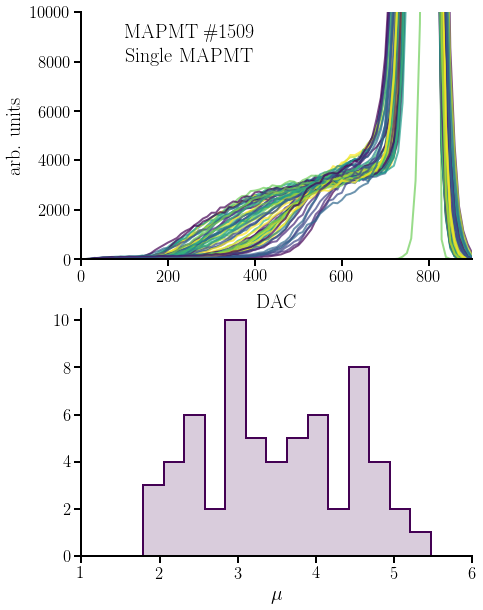

In [58]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(7, 10)
ax[0].set_prop_cycle(cool_cycler)
ax[0].plot(DAC_PM_unpot, pmt_unpot, alpha=0.7)
ax[0].set_ylim(0, y_lim)

ax[0].set_xlabel('DAC', labelpad=10, fontsize=fs)
ax[0].set_ylabel('arb. units', labelpad=5, fontsize=fs)
ax[0].text(100, 9000, 'MAPMT \#' + str(PMT), fontsize=fs)
ax[0].text(100, 8000, 'Single MAPMT', fontsize=fs)

ax[1].hist(gains_before, bins=bins, alpha=0.2, color=plt.cm.viridis(0));
ax[1].hist(gains_before, bins=bins, histtype='step', lw=2, color=plt.cm.viridis(0));
ax[1].set_xlabel('$\mu$', fontsize=fs)
fig.savefig('figures/before_potting.pdf', dpi=500, bbox_inches='tight')

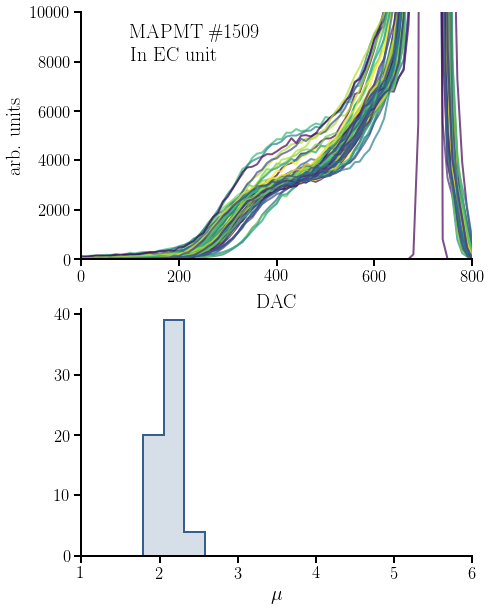

In [59]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(7, 10)
ax[0].set_prop_cycle(cool_cycler)
ax[0].plot(DAC_PM_pot, pmt_pot, alpha=0.7)
ax[0].set_ylim(0, y_lim)

ax[0].set_xlabel('DAC', labelpad=10, fontsize=fs)
ax[0].set_ylabel('arb. units', labelpad=5, fontsize=fs)
ax[0].text(100, 9000, 'MAPMT \#' + str(PMT), fontsize=fs)
ax[0].text(100, 8000, 'In EC unit', fontsize=fs)

ax[1].hist(gains_after, bins=bins, alpha=0.2, color=plt.cm.viridis(0.3));
ax[1].hist(gains_after, bins=bins, histtype='step', lw=2, color=plt.cm.viridis(0.3));
ax[1].set_xlabel('$\mu$', fontsize=fs)
fig.savefig('figures/after_potting.pdf', dpi=500, bbox_inches='tight')